In [1]:
# Install dependencies (if needed)
!pip install -q scikit-learn pandas matplotlib

# Importer les bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, confusion_matrix

# Load dataset from GitHub
import pandas as pd

url = "https://raw.githubusercontent.com/hdmanoach/churn-knn/main/data/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(url)

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df.info()
df.describe()
df.isnull().sum()
df['Churn'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,count
Churn,
No,5174
Yes,1869


In [4]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.isnull().sum()


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [3]:
df = df.dropna()
df.isnull().sum()


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [6]:
#Séparer X et y
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn'].map({'Yes': 1, 'No': 0})


In [14]:
X = pd.get_dummies(X, drop_first=True)

# Remplacer toutes les valeurs manquantes par 0
X = X.fillna(0)


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [17]:
#Calcul du F1 pour k=1 à 30
f1_scores = []
k_values = range(1, 31)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)


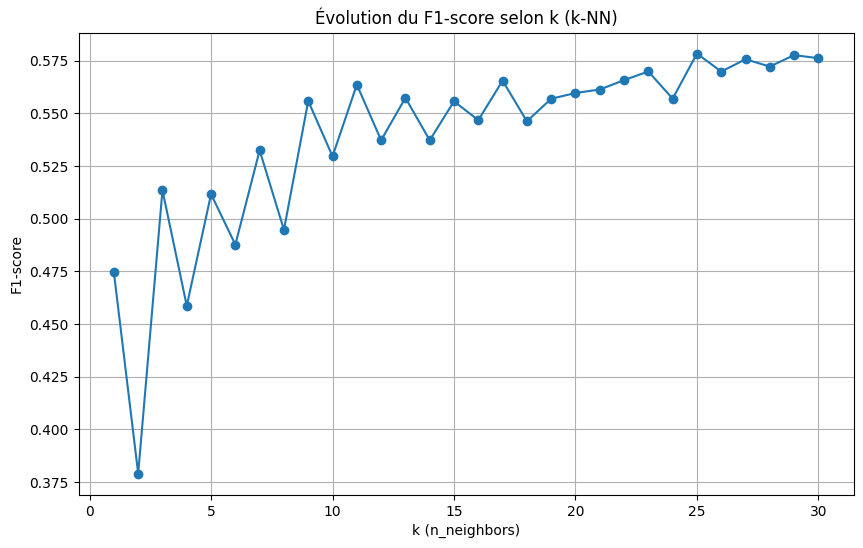

In [18]:

# 4) Affichage du graphique F1-score vs k
plt.figure(figsize=(10, 6))
plt.plot(k_values, f1_scores, marker='o')
plt.title("Évolution du F1-score selon k (k-NN)")
plt.xlabel("k (n_neighbors)")
plt.ylabel("F1-score")
plt.grid(True)
plt.show()

In [19]:

# 5) Meilleur k
best_k = k_values[f1_scores.index(max(f1_scores))]
best_f1 = max(f1_scores)
print("Meilleur k:", best_k)
print("Meilleur F1-score:", best_f1)

Meilleur k: 25
Meilleur F1-score: 0.5783783783783784


In [20]:
# 6) Entraînement avec le meilleur k
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [21]:
# 7) Prédictions avec le meilleur modèle
y_pred_best = knn_best.predict(X_test)

In [22]:
# 8) Affichage de la matrice de confusion
print("Matrice de confusion :")
print(confusion_matrix(y_test, y_pred_best))

Matrice de confusion :
[[883 152]
 [160 214]]


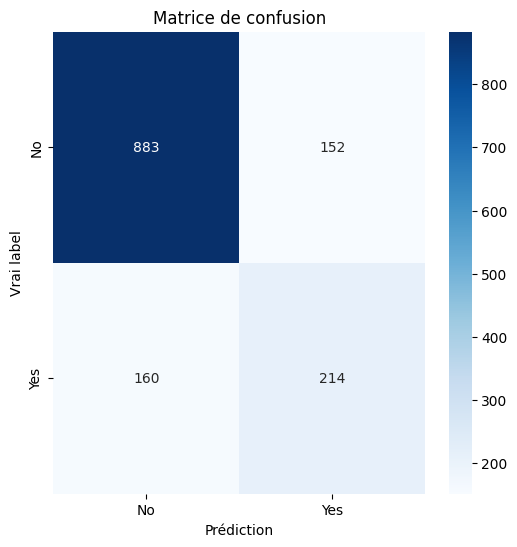

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No","Yes"], yticklabels=["No","Yes"])
plt.title("Matrice de confusion")
plt.xlabel("Prédiction")
plt.ylabel("Vrai label")
plt.show()



              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1035
           1       0.58      0.57      0.58       374

    accuracy                           0.78      1409
   macro avg       0.72      0.71      0.71      1409
weighted avg       0.78      0.78      0.78      1409



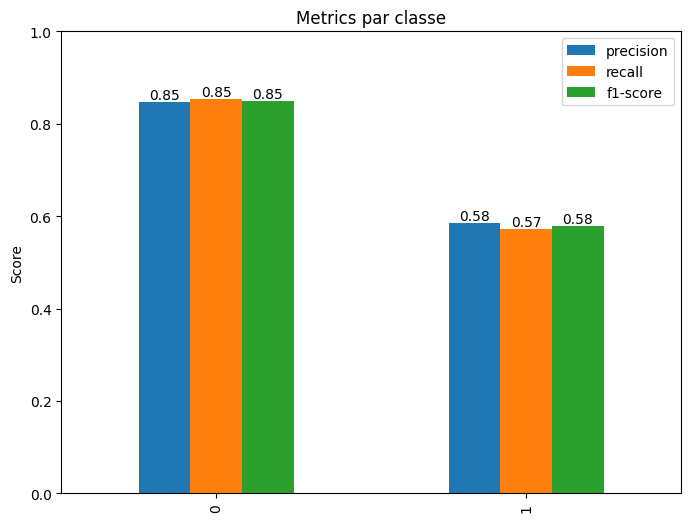

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Affichage texte
print(classification_report(y_test, y_pred_best))


report = classification_report(y_test, y_pred_best, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# On enlève la ligne "accuracy" qui n'est pas une classe
df_metrics = df_report.iloc[:2, :3]  # precision, recall, f1-score pour classes 0 et 1

ax = df_metrics.plot(kind='bar', figsize=(8,6))
# Ajouter les valeurs sur les barres
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.2f}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', fontsize=10, color='black',
        xytext=(0, 5), textcoords='offset points'
    )
plt.title("Metrics par classe")
plt.ylabel("Score")
plt.ylim(0,1)
plt.show()
